# Familiar EDA:  Red and Black Chinchompas #
In order to get an idea of the EDA process, I decided to explore 2 similar commodities 
- Red Chinchompas 
- Black Chinchompas

## Practical Interest ##
From 18 Sept. 2020 to 25 Sept. 2020, black chinchompas fell by 266 gp. Across a 6 month period, I can see 7 total ~300 gp drops. I'd like to investigate if these dips happen regularly or can be predicted. 

As of now, my account is set up to hunt reds more efficiently (and safely). I think red chinchompas fall more frequently (thank black chinchompas), but in smaller quantities. I'd like to see if this claim is true.

In [1]:
from tradeable_item import TradeableItem
%matplotlib inline

In [2]:
#commodities of interest
redChins = TradeableItem("Red Chinchompa")
blkChins = TradeableItem("Black Chinchompa")

In [3]:
redChins.table.describe()

,Close,Average,Volume
count,180.000000,180.000000,1.800000e+02
mean,1356.300000,1402.761111,5.544560e+06
std,174.117436,190.605075,2.540430e+06
min,1079.000000,1206.000000,0.000000e+00
25%,1225.750000,1245.000000,4.026028e+06
50%,1305.500000,1305.500000,5.779871e+06
75%,1451.750000,1589.500000,6.969393e+06
max,1819.000000,1770.000000,1.345334e+07


/Users/nikourriola/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


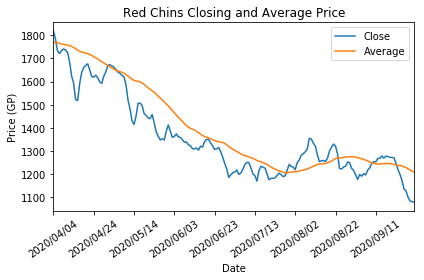

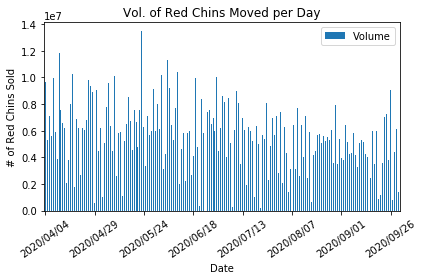

In [4]:
#visually verify that the data collected matches official OSRS GX listing
redChins.plot_time_series("Item Timestamps", ["Close", "Average"], "Red Chins Closing and Average Price", ylabel="Price (GP)", save_plot=False, verbose=True)
redChins.plot_bar_graph("Item Timestamps", ["Volume"], "Vol. of Red Chins Moved per Day", ylabel="# of Red Chins Sold", save_plot=False, verbose=True)

/Users/nikourriola/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


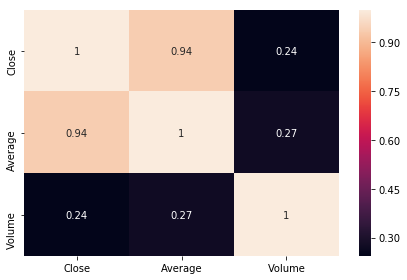

,Close,Average,Volume
Close,1.000000,0.940233,0.244214
Average,0.940233,1.000000,0.274571
Volume,0.244214,0.274571,1.000000


In [5]:
#check for possible correlations with these time series
redChins.correlation_matrix(["Close", "Average", "Volume"], " Red Chins Correlation Matrix", save=False, verbose=True)

This is a correlation matrix for 6 month data. Correlation coefficients \>0.2 between trade volume and prices are lower than I expected because my naive assumption of price was that the price is soley determined by supply and demand. I believe this result is saying that volume is only one part of what's driving the price (which is more realistic).

I"m curious about the reverse situation:  how does the current price affect trade volume? From a seller's POV (aka my account) I can imagine seeing the rapid price drops as a sign to cash out on my supply of chins. 

I specifically want to note what happened around Sept. 26th. The most units moved in the last 30 days happened on 26/09/20 which is also the tail end of a crash. The day after, it seemed like the number of units sold slowed the crash somewhat. Let's actaully put numbers to these observations with simple plots/calculations

**Question**:  What does the series look like per month?

In [6]:
#label each record with its month
months = {"01":"Jan",
"02":"Feb",
"03":"Mar",
"04":"Apr",
"05":"May",
"06":"Jun",
"07":"Jul",
"08":"Aug",
"09":"Sep",
"10":"Oct",
"11":"Nov",
"12":"Dec"}

rdf = redChins.table
rdf["Month"] = rdf["Timestamps"].apply(lambda x: x[5:7])
rdf["Month"] = rdf["Month"].apply(lambda x: months[x])

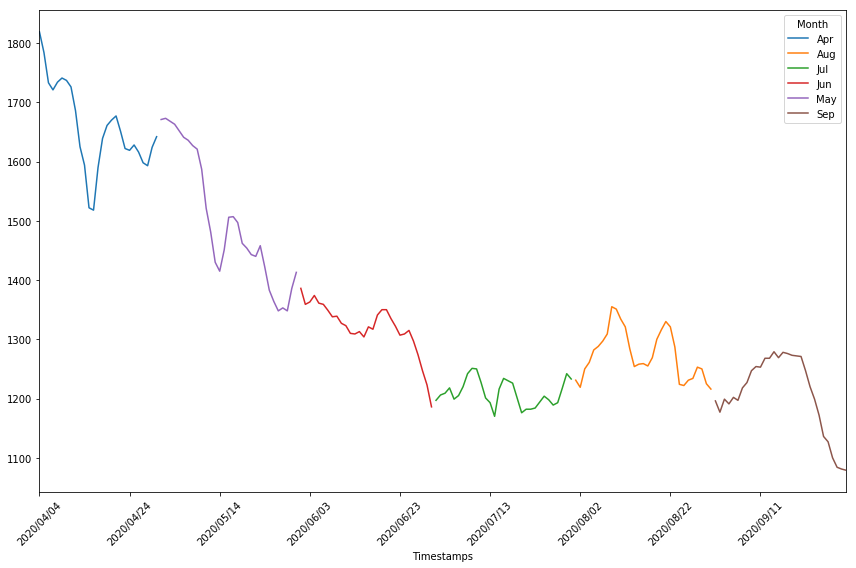

In [9]:
pvt = rdf.pivot(index="Timestamps", columns="Month", values="Close")
pvt.plot(rot=45, figsize=(12,8))

Each month looks like it can be characterized as having negative overall trend and 2 distinct price drops.
(*I'm calling this the "W" shape*)

What experiment can I make that would test the frequency of price drops per month; for the whole data set? 

*NB:  September looks like the first time in 6 months that only 1 major price drop occurred*

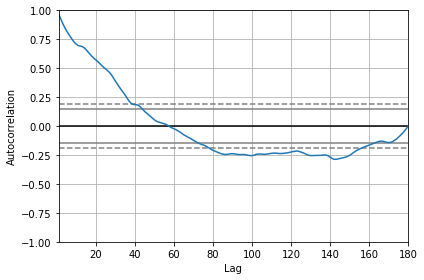

In [6]:
import pandas as pd
pd.plotting.autocorrelation_plot(redChins.table["Close"])